### Data Background

> The Movie Database (TMDb) Dataset contains information about more than 10,000 movies. This information includes ratings based on popularity, the number of votes cast, the average vote, casts, directors, and production companies, as well as additional information regarding various movies' budgets and the revenue generated by respective movies.

> It is important to note that in 2010, as a direct result of the inflation in the value of the dollar, a new feature called budget inflation and revenue inflation was introduced in an effort to adequately account for this monetary index.



**Some Key Questions to be Explored and Visualized**

> * Genres of the top 10 movies with the highest inflation revenue
> * Movies of the top 10 movies with the highest inflation revenue
> * Top cast of the top 10 movies in a movies with highest inflation revenue
> * Directors of the top 10 movies of movies with the highest inflation revenue
> * Production companies of the top 10 movies with the highest inflation revenue
> * Top movies with their popularity rating
> * Top movies with their average vote
> * Percentage Change in budget and revenue due to 2010 dollar inflation

**Importing Libraries**

In [1]:
#Import Numpy
import numpy as np

#Import Pandas
import pandas as pd

#Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns
sns.set_theme()


#Import Warning for ignoring unneccessary warnings
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### Data Exploration

In [3]:
# The top 5 columns of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# The last five (5) columns of the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Number of rows and columns in the dataset

print('The number of rows in the dataset is {}'.format(df.shape[0]))

print('The number of rows in the dataset is {}'.format(df.shape[1]))

The number of rows in the dataset is 10866
The number of rows in the dataset is 21


In [6]:
# Names of columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Statistical description of numerical dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Some Inference from statistical description**
> * The movie with the highest revenue due to the inflation in 2010 is worth 2.827124e+08 dollars
> * Most movies had an average revenue due to the inflation of 5.136436e+07
> * The movie with the highest budget due to the inflation in 2010 is worth 2.827124e+09 dollars
> * Most movies had an average budget due to the inflation of 1.755104e+07
> * Most movies had an average vote of 5.974922 and with maximum vote average of 9.2
> * Most movies have an average runtime of 102mins and with maximum runtime of 900mins
> * Most movies have an average popularity rating of 0.64 and with maximum popularity rating of 32.9
> * The maximum number of vote obtained (count) was 9767 and an average of 217

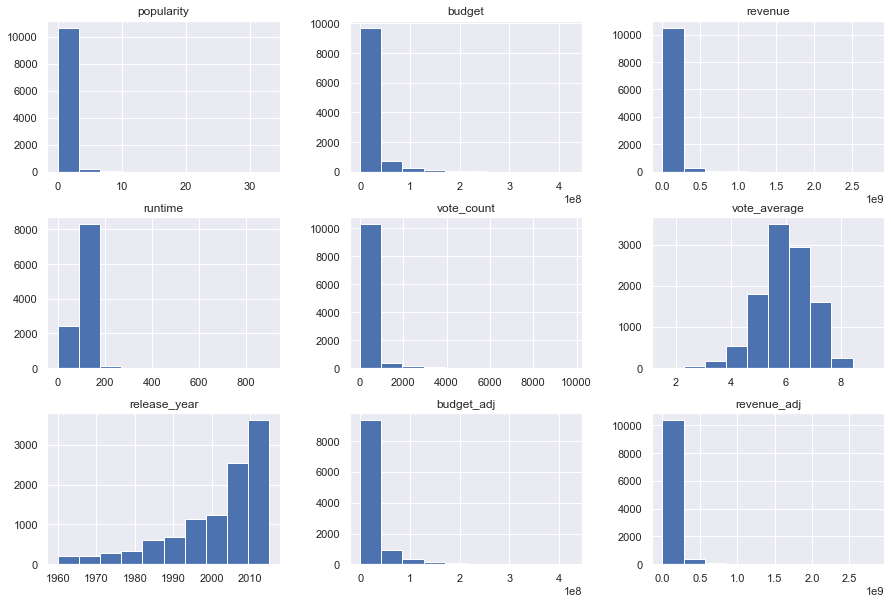

In [8]:
# Distribrition of numerical features in the dataset

df.hist(df.columns[1:], figsize=(15,10));
plt.savefig('Statistical chart distribution')

In [9]:
# Preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# Sum of missing values in each column of the dataset

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# checking the percentage of missing values

def missing_values_tables(df):
    # Total Missing Values
    missing_values = df.isnull().sum()
    
    # Percentage of Missing Values
    missing_value_percent = 100 * (df.isnull().sum()/len(df))
    
    # Make a table with the results
    missing_value_table = pd.concat([missing_values, missing_value_percent], axis = 1)
    
    # Rename the columns 
    missing_values_table_rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
                        
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = missing_values_table_rename_columns[missing_values_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Printing some sumarry information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename_columns.shape[0]) +
              " columns that have missing values.")
                                   
     # Return the dataframe with missing information
    return missing_values_table_rename_columns

In [12]:
missing_values_tables(df)

Your selected dataframe has 21 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
homepage,7930,73.0
tagline,2824,26.0
keywords,1493,13.7
production_companies,1030,9.5
cast,76,0.7
director,44,0.4
genres,23,0.2
imdb_id,10,0.1
overview,4,0.0


In [13]:
# Number of unique element in each column

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [14]:
sum(df.duplicated())

1

### Data Cleaning
> * Removing columns that are not important to the analysis
> * Drop duplicate rows in the dataset
> * Dropping missing values 
> * Dropping null rows
> * Changing to the required data types in preparation for analysis
> * Seperation of columns with element combined by '|'. Features such as Cast, Genres and Production companies
> * Renaming revenue_adj and budget_adj columns to suffix of _inflation

In [15]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Important features to be explored based on the questions to be explored**
> * Popularity
> * Budget
> * Revenue
> * Original title
> * Cast
> * Director
> * Genres
> * Productionn companies 
> * vote_average
> * Release Year
> * budget_adj
> * revenue_adj

>> **Note**: Drop all other columns not listed above


In [16]:
# Dropping columns with their index number along column axis

df.drop(df.columns[[0, 1, 7, 9, 10, 11, 12, 15, -5]], axis = 1, inplace = True)

In [17]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
# Checking for missing values in the missing value table 
missing_values_tables(df)

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
production_companies,1030,9.5
cast,76,0.7
director,44,0.4
genres,23,0.2


In [19]:
# Dropping duplicate rows

df.drop_duplicates(inplace=True)

In [20]:
# Dropping null rows

df.dropna(inplace=True)

In [21]:
# Removing revenue with 0 revenue from the dataframe.

df.drop(df[df['revenue'] == 0].index,inplace=True)

In [22]:
# convert the 'release_year' column to string from int format for visualization purpose

df['release_year'] = df['release_year'].astype(str)

In [23]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
# For the purpose of ease in visualization and analysis, filter the Cast, Genres and Production Companies features to only one element

# Seperating the columns based on the '|'
df['Cast'], df['Other_cast'] = df['cast'].str.split('|', 1).str
df.drop(['Other_cast', 'cast'], axis = 1, inplace=True)


df['Genres'], df['Other_genres'] = df['genres'].str.split('|', 1).str
df.drop(['Other_genres', 'genres'], axis = 1, inplace=True)

df['Production_companies'], df['Other_production_companies'] = df['production_companies'].str.split('|', 1).str
df.drop(['Other_production_companies', 'production_companies'], axis = 1, inplace=True)

df.head()

,popularity,budget,revenue,original_title,director,vote_average,release_year,budget_adj,revenue_adj,Cast,Genres,Production_companies
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Universal Studios
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Village Roadshow Pictures
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Summit Entertainment
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Lucasfilm
4,9.335014,190000000,1506249360,Furious 7,James Wan,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Universal Pictures


In [25]:
# Renaming budget_adj and revenue_adj

df.rename(columns = {'budget_adj':'budget_inflation', 'revenue_adj':'revenue_inflation'}, inplace = True)

In [26]:
df['revenue_inflation'].max()

2827123750.41189

### Exploratory Data Analysis

**Key Questions to be Explored and Visualized**

> * Genres of the top 10 movies with the highest inflation revenue
> * Movies of the top 10 movies with the highest inflation revenue
> * Top cast of the top 10 movies in a movies with highest inflation revenue
> * Directors of the top 10 movies of movies with the highest inflation revenue
> * Production companies of the top 10 movies with the highest inflation revenue
> * Top movies with their popularity rating
> * Top movies with their average vote

**Correlation Analysis Table**
> * Heatmap chart showing correlation
> * Percentage Change in budget and revenue due to 2010 dollar inflation

**Other Visuals**
> Revenue versus Revenue Inflation to complement percentage change Calculation
> Budget versus Budget Inflation to complement percentage change Calculation
> Release year of Top movies with Inflated Revenue


**NOTE:** The visualization part is based on revenue_inflation of 2010 dollars except for visualization that covers comparison of revenue and revenue_inflation

In [27]:
# Top 10 movies based on the highest revenue due to 2010 inflation

df_top_rev = df.nlargest(10, 'revenue_inflation')
df_top_rev

,popularity,budget,revenue,original_title,director,vote_average,release_year,budget_inflation,revenue_inflation,Cast,Genres,Production_companies
1386,9.432768,237000000,2781505847,Avatar,James Cameron,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Action,Ingenious Film Partners
1329,12.037933,11000000,775398007,Star Wars,George Lucas,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Adventure,Lucasfilm
5231,4.355219,200000000,1845034188,Titanic,James Cameron,7.3,1997,2.716921e+08,2.506406e+09,Kate Winslet,Drama,Paramount Pictures
10594,2.010733,8000000,441306145,The Exorcist,William Friedkin,7.2,1973,3.928928e+07,2.167325e+09,Linda Blair,Drama,Warner Bros.
9806,2.563191,7000000,470654000,Jaws,Steven Spielberg,7.3,1975,2.836275e+07,1.907006e+09,Roy Scheider,Horror,Universal Pictures
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Lucasfilm
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,7.2,1982,2.372625e+07,1.791694e+09,Henry Thomas,Science Fiction,Universal Pictures
8094,1.136610,22000000,1106279658,The Net,Irwin Winkler,5.6,1995,3.148127e+07,1.583050e+09,Sandra Bullock,Crime,Columbia Pictures
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,6.6,1961,2.917944e+07,1.574815e+09,Rod Taylor,Adventure,Walt Disney Productions
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,7.3,2012,2.089437e+08,1.443191e+09,Robert Downey Jr.,Science Fiction,Marvel Studios


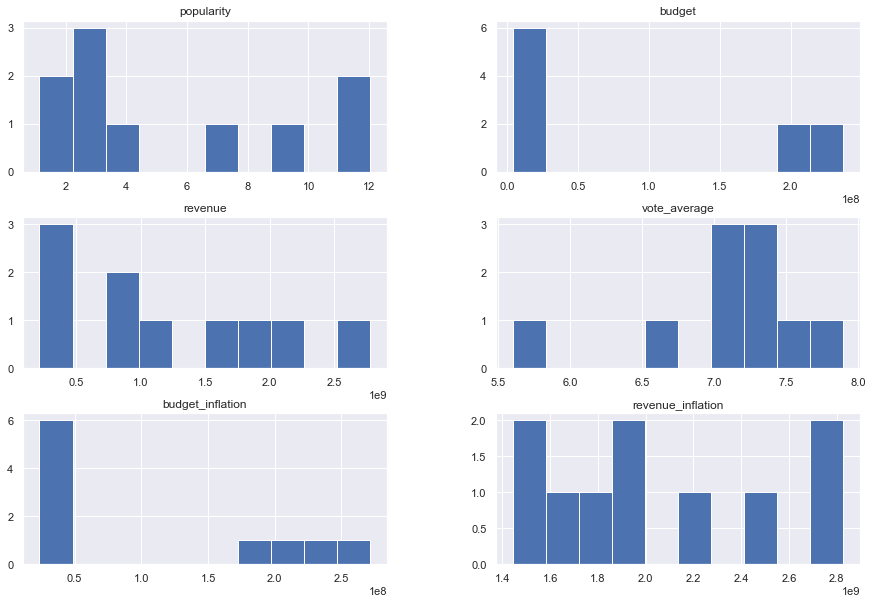

In [28]:
# Distribution of numerical data in the top_rev data

df_top_rev.hist(df.columns, figsize=(15,10));

### GENRES of the top 10 movies with the highest inflated revenue

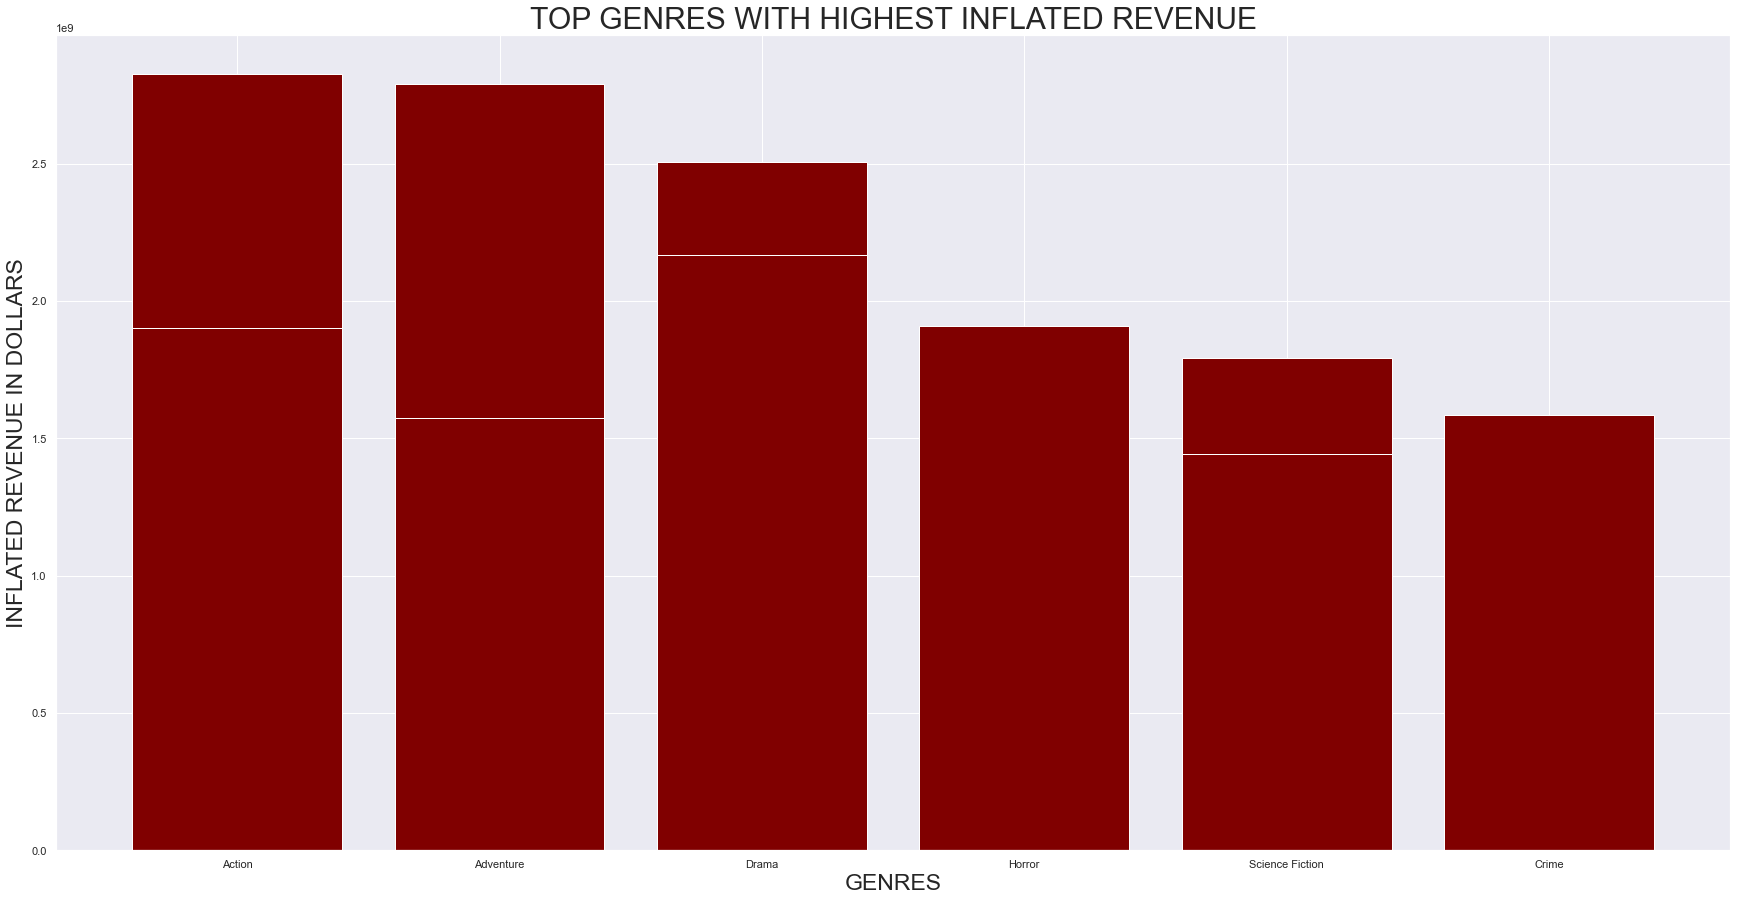

<Figure size 432x288 with 0 Axes>

In [29]:
# GENRES of the top 10 movies with the highest inflated revenue
fig = plt.figure(figsize =(30, 15))

plt.bar(df_top_rev['Genres'], df_top_rev['revenue_inflation'], color ='maroon');

plt.xlabel("GENRES", fontsize = 23)
plt.ylabel("INFLATED REVENUE IN DOLLARS", fontsize = 23)
plt.title("TOP GENRES WITH HIGHEST INFLATED REVENUE", fontsize = 30)
plt.show()
plt.savefig('TOP GENRES WITH HIGHEST INFLATED REVENUE')

### Original title of the top 10 movies with the highest inflated revenue

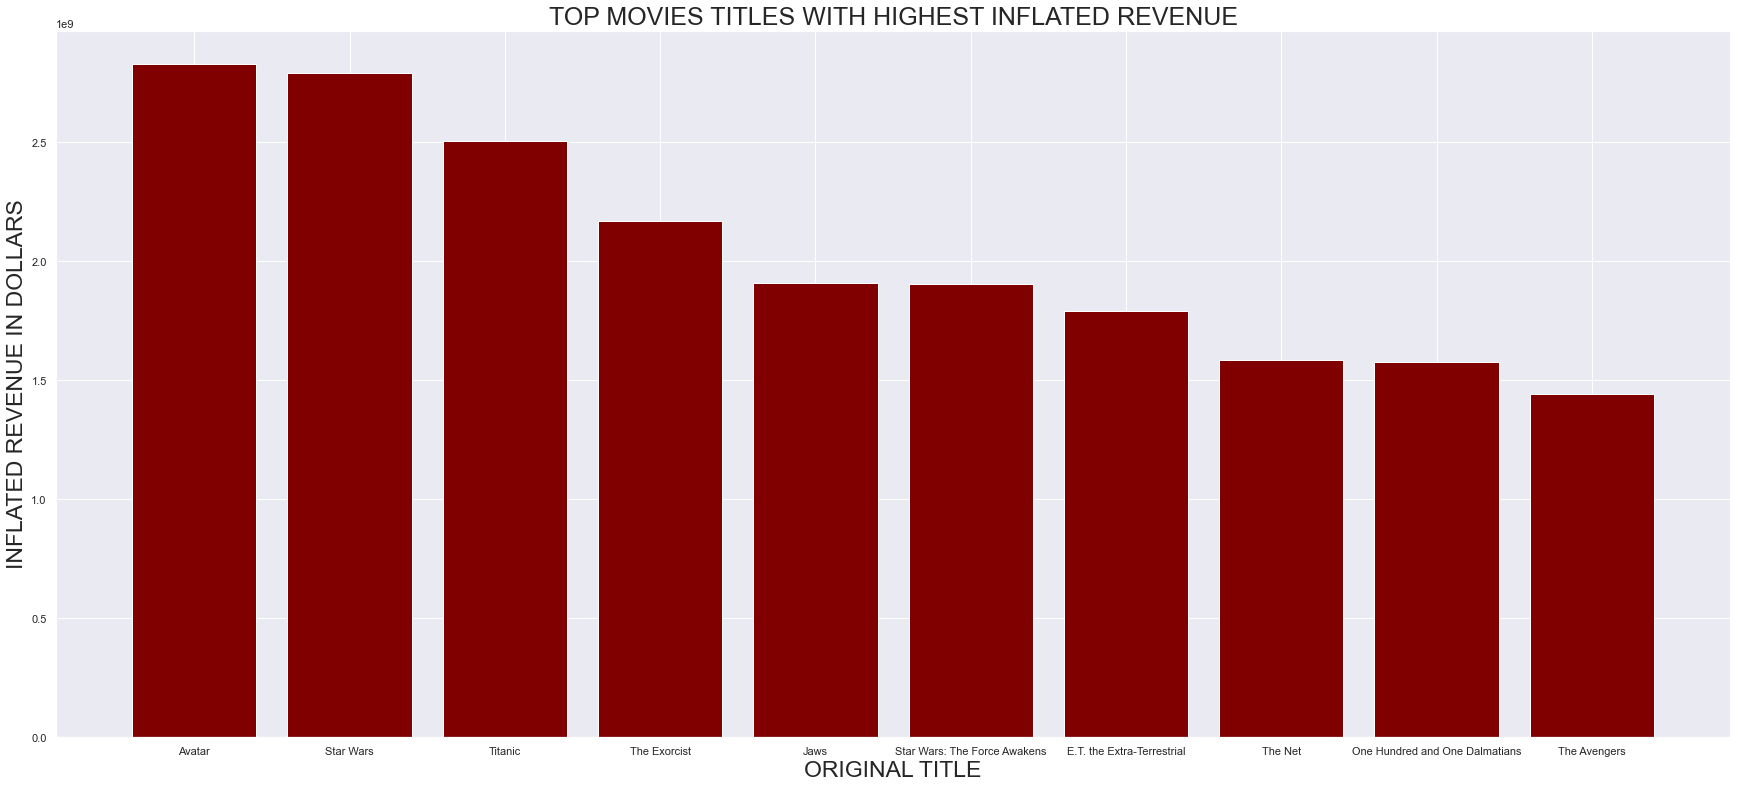

In [30]:
## Original title of the top 10 movies with the highest inflated revenue
fig = plt.figure(figsize =(30, 13))

plt.bar(df_top_rev['original_title'], df_top_rev['revenue_inflation'], color ='maroon');

plt.xlabel("ORIGINAL TITLE", fontsize = 23)
plt.ylabel("INFLATED REVENUE IN DOLLARS", fontsize = 23)
plt.title("TOP MOVIES TITLES WITH HIGHEST INFLATED REVENUE", fontsize= 25)
plt.show()

### Cast of the top 10 movies with the highest inflated revenue

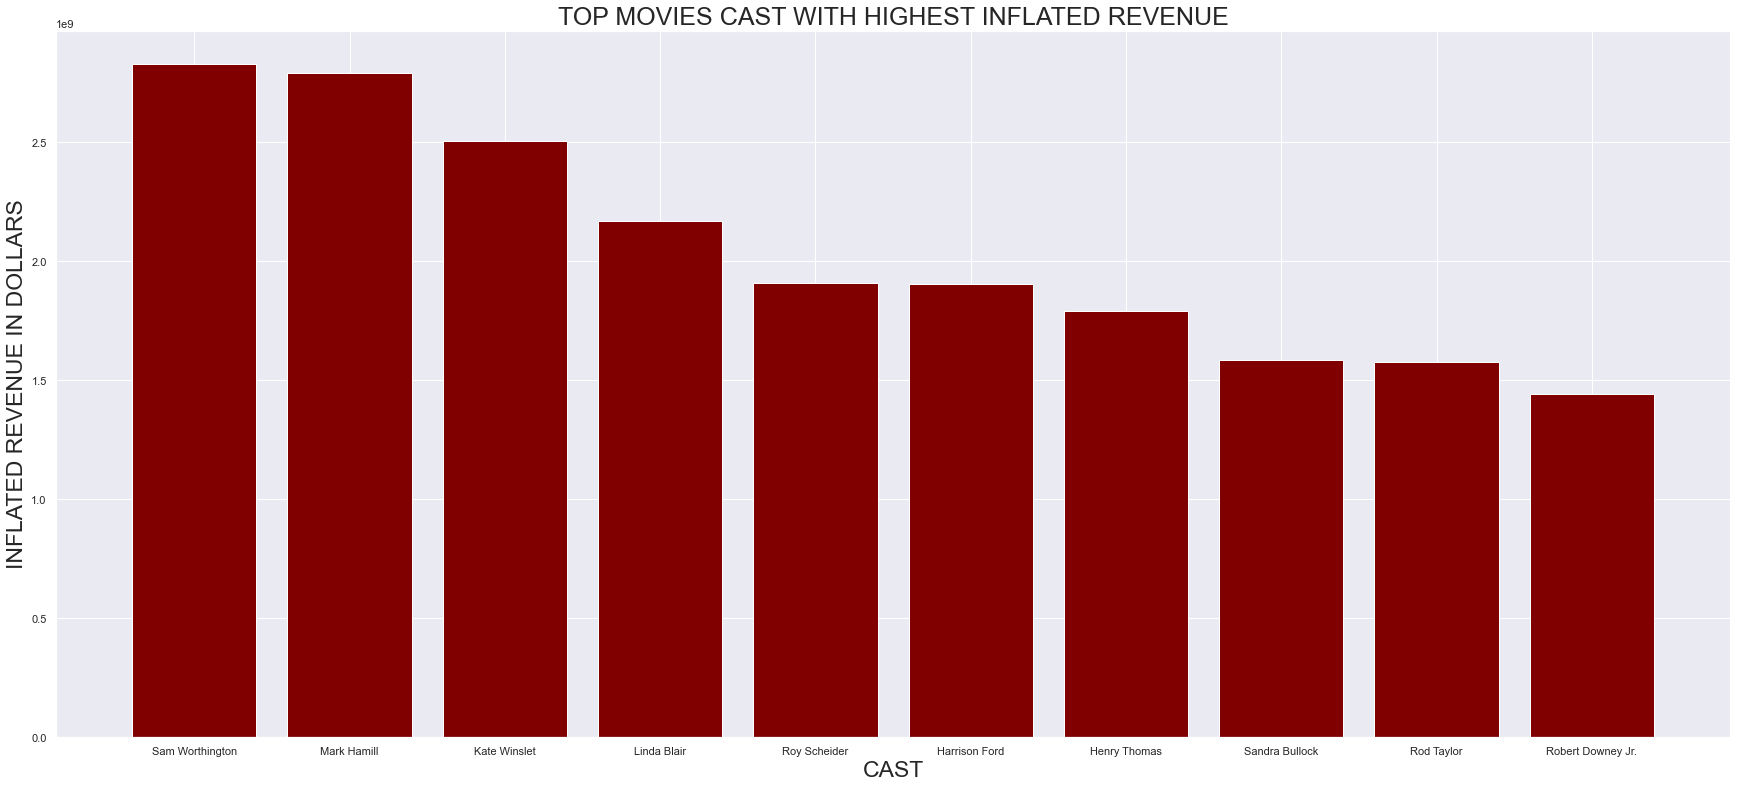

In [31]:
## Cast of the top 10 movies with the highest inflated revenue
fig = plt.figure(figsize =(30, 13))

plt.bar(df_top_rev['Cast'], df_top_rev['revenue_inflation'], color ='maroon');
 
plt.xlabel("CAST", fontsize = 23)
plt.ylabel("INFLATED REVENUE IN DOLLARS", fontsize = 23)
plt.title("TOP MOVIES CAST WITH HIGHEST INFLATED REVENUE", fontsize = 25)
plt.show()

### Director of the top 10 movies with the highest inflated revenue

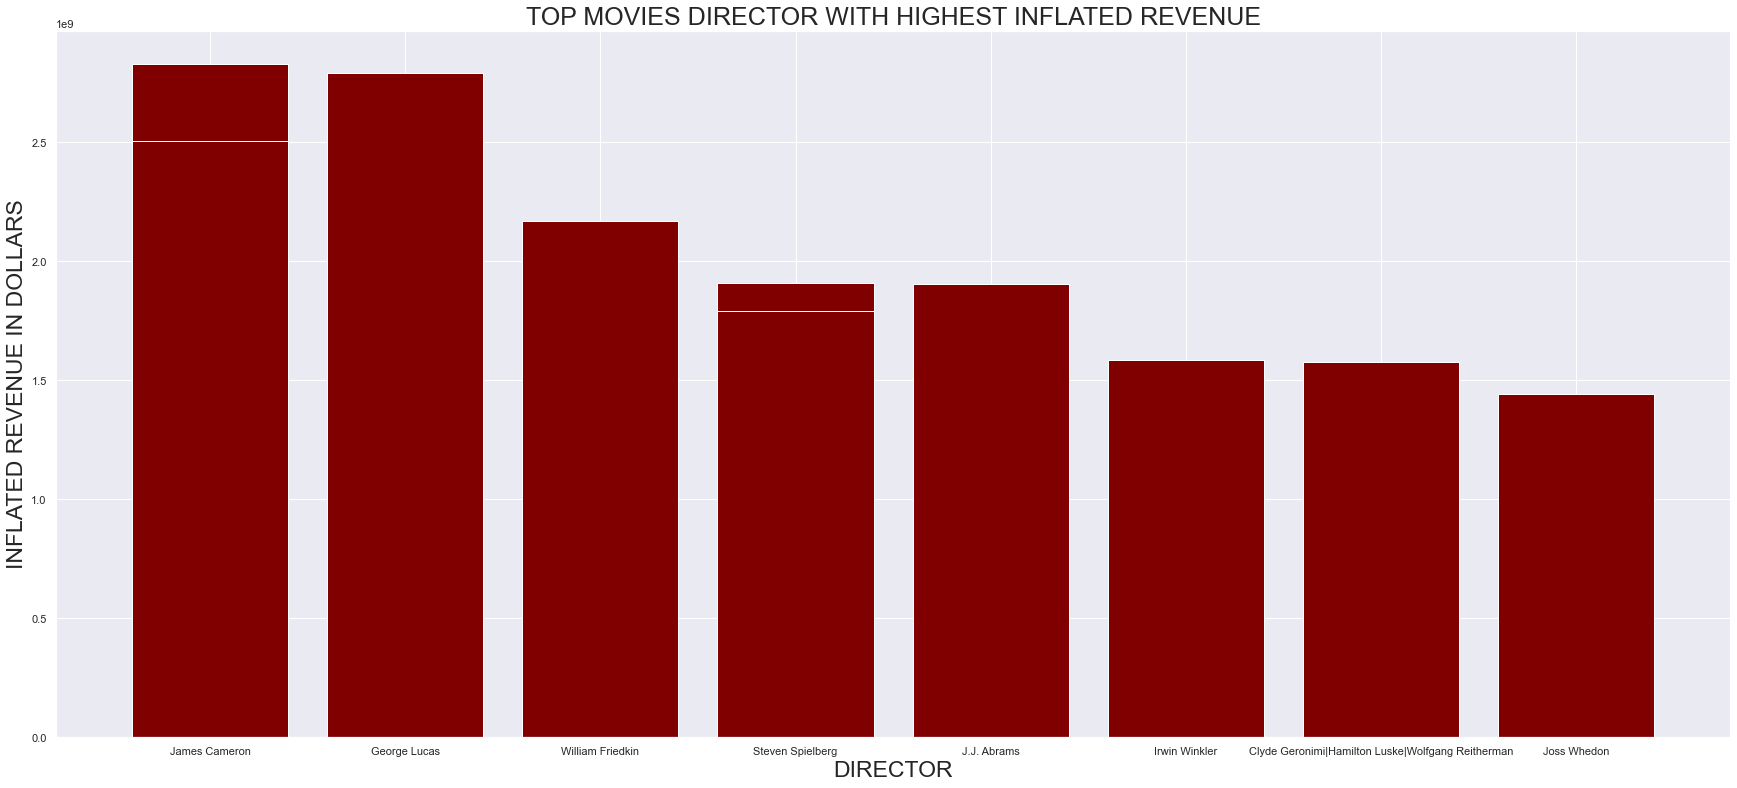

In [32]:
## Director of the top 10 movies with the highest inflated revenue
fig = plt.figure(figsize =(30, 13))

plt.bar(df_top_rev['director'], df_top_rev['revenue_inflation'], color = 'maroon');
 
plt.xlabel("DIRECTOR", fontsize = 23)
plt.ylabel("INFLATED REVENUE IN DOLLARS", fontsize = 23)
plt.title("TOP MOVIES DIRECTOR WITH HIGHEST INFLATED REVENUE", fontsize = 25)
plt.show()

### Production companies of the top 10 movies with the highest inflated revenue

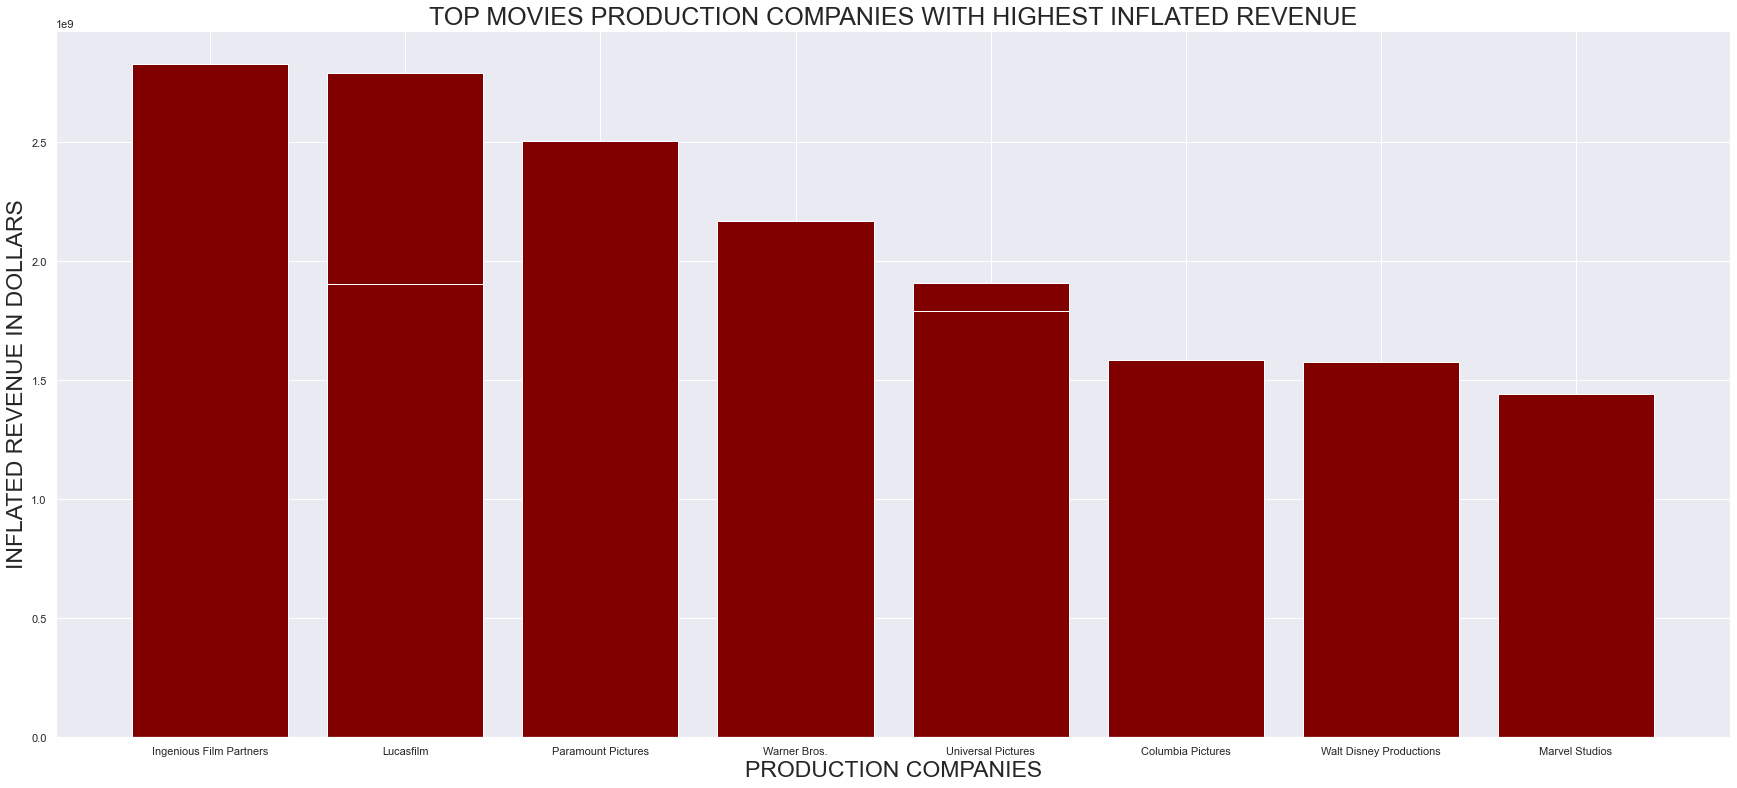

In [33]:
## Production Comapnies of the top 10 movies with the highest inflated revenue
fig = plt.figure(figsize =(30, 13))

plt.bar(df_top_rev['Production_companies'][0:10], df_top_rev['revenue_inflation'][0:10], color = 'maroon');
 
plt.xlabel("PRODUCTION COMPANIES", fontsize = 23)
plt.ylabel("INFLATED REVENUE IN DOLLARS", fontsize = 23)
plt.title("TOP MOVIES PRODUCTION COMPANIES WITH HIGHEST INFLATED REVENUE", fontsize = 25)
plt.show()

### Top Movies with Popularity Rating

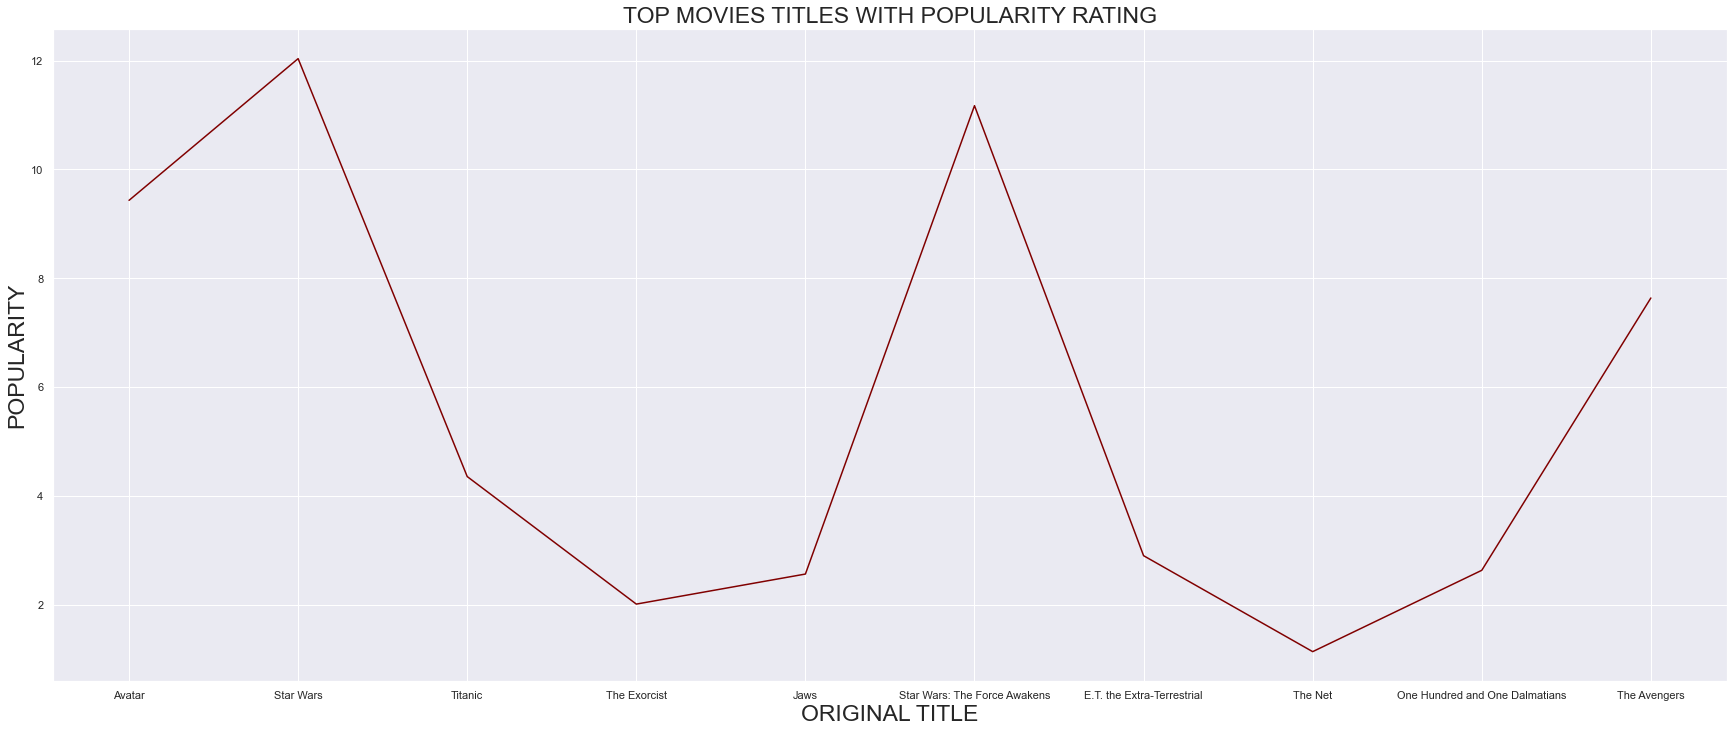

In [34]:
# Popularity of the top 10 movies 
fig = plt.figure(figsize =(30, 12))

plt.plot(df_top_rev['original_title'], df_top_rev['popularity'], color ='maroon');

plt.xlabel("ORIGINAL TITLE", fontsize = 23)
plt.ylabel("POPULARITY", fontsize = 23)
plt.title("TOP MOVIES TITLES WITH POPULARITY RATING", fontsize = 23)
plt.show()

### Top Movies with Average Vote

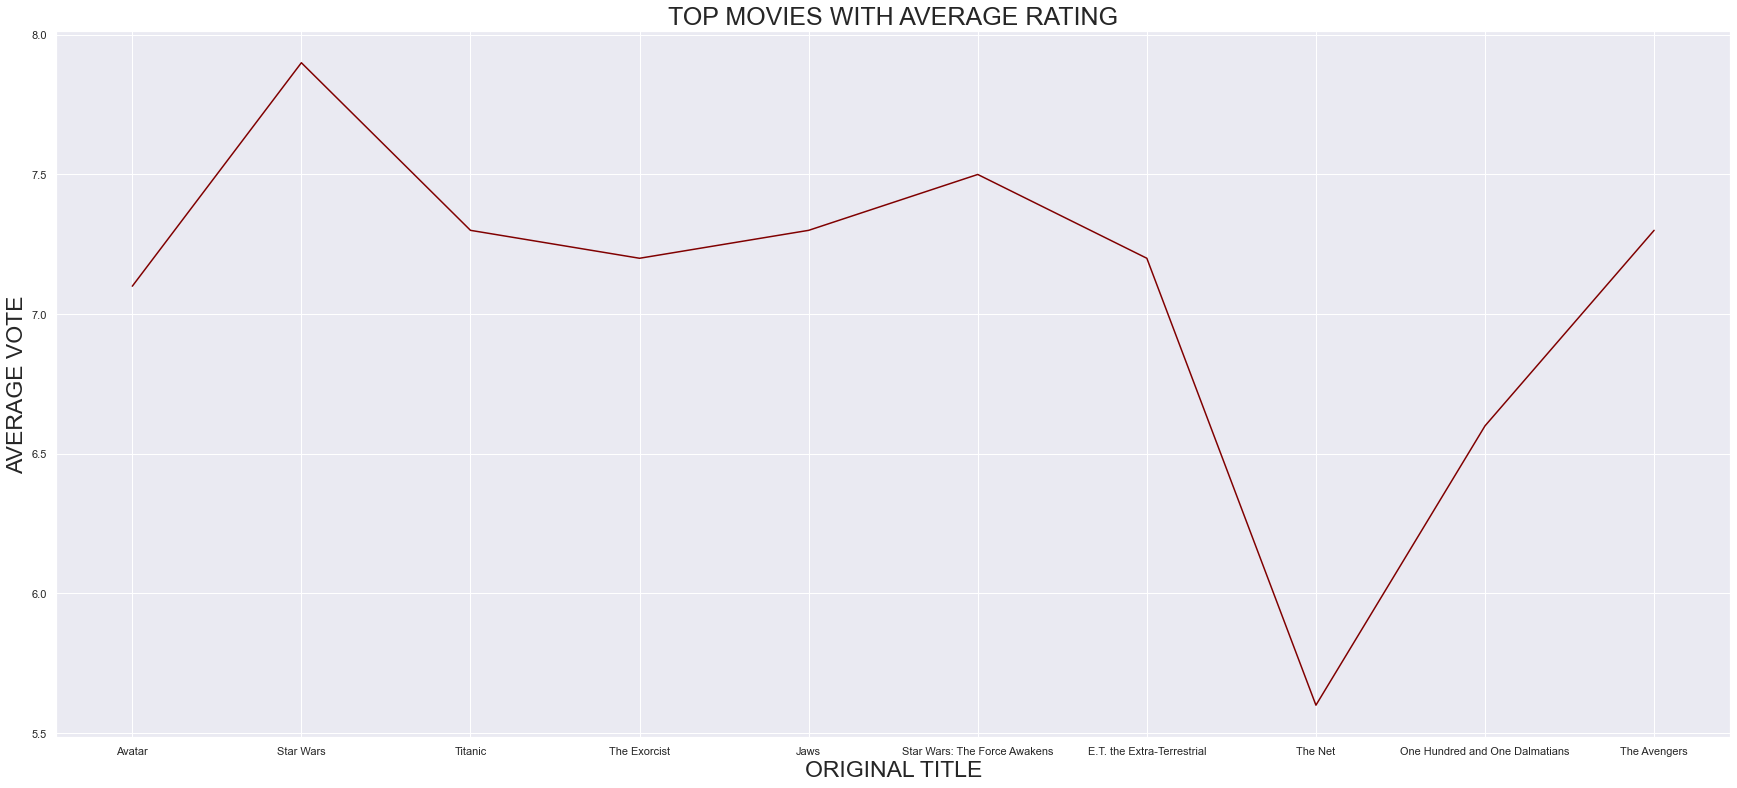

In [35]:
# Average vote of the top 10 movies 
fig = plt.figure(figsize =(30, 13))

plt.plot(df_top_rev['original_title'], df_top_rev['vote_average'], color ='maroon');

plt.xlabel("ORIGINAL TITLE", fontsize = 23)
plt.ylabel("AVERAGE VOTE", fontsize = 23)
plt.title("TOP MOVIES WITH AVERAGE RATING", fontsize = 25)
plt.show()

### Correlation Analysis

In [36]:
correlation = df.corr()
correlation

,popularity,budget,revenue,vote_average,budget_inflation,revenue_inflation
popularity,1.000000,0.476986,0.627028,0.292735,0.435200,0.558839
budget,0.476986,1.000000,0.702094,0.037367,0.963688,0.557431
revenue,0.627028,0.702094,1.000000,0.209045,0.672157,0.904440
vote_average,0.292735,0.037367,0.209045,1.000000,0.049379,0.245138
budget_inflation,0.435200,0.963688,0.672157,0.049379,1.000000,0.590162
revenue_inflation,0.558839,0.557431,0.904440,0.245138,0.590162,1.000000


<AxesSubplot:>

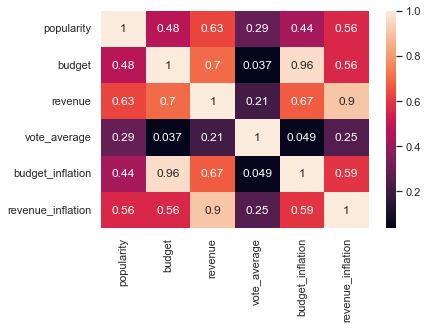

In [37]:
sns.heatmap(correlation, annot=True )

**Heatmap Correlation Analysis Inferences:**
> * There is a strong correlation between popularity of movie and revenue
> * There is a strong correlation between budget and revenue
> * Correlation between budget and budget inflation as well as revenue and revenue inflation was 1, which informs that the percentage change due to 2010 inflation was the same for those features


Text(0.5, 1.0, 'RELATIONSHIP BETWEEN BUDGET AND REVENUE')

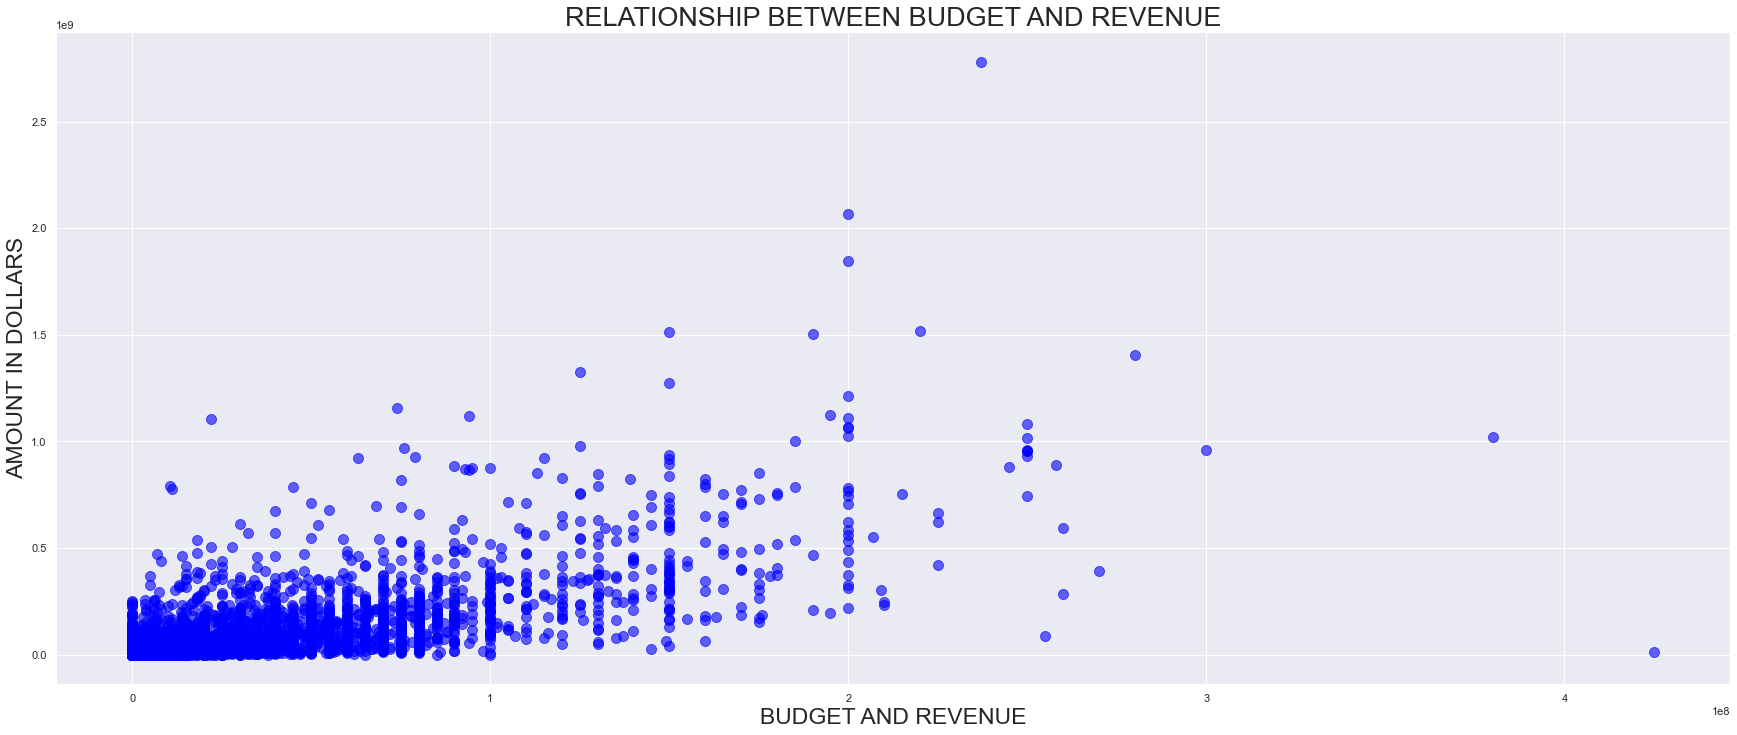

In [38]:
# Scatter plot showing the relatedness in the budget and the revenue
fig = plt.figure(figsize =(30, 12))
color = ['blue']
plt.scatter(df['budget'], df['revenue'],s=100,c=color,alpha=0.6, marker='o')
plt.xlabel('BUDGET AND REVENUE', fontsize = 23)
plt.ylabel('AMOUNT IN DOLLARS' , fontsize = 23)
plt.title('RELATIONSHIP BETWEEN BUDGET AND REVENUE', fontsize = 27)

**Scatterplot relationship between the budget and Revenue**

> This scatterplot shows is a strong correlation between budget and revenue which is indicative of the fact that a movie with high budget will most likely generated a high revenue


Text(0.5, 1.0, 'RELATIONSHIP BETWEEN POPULARITY AND REVENUE')

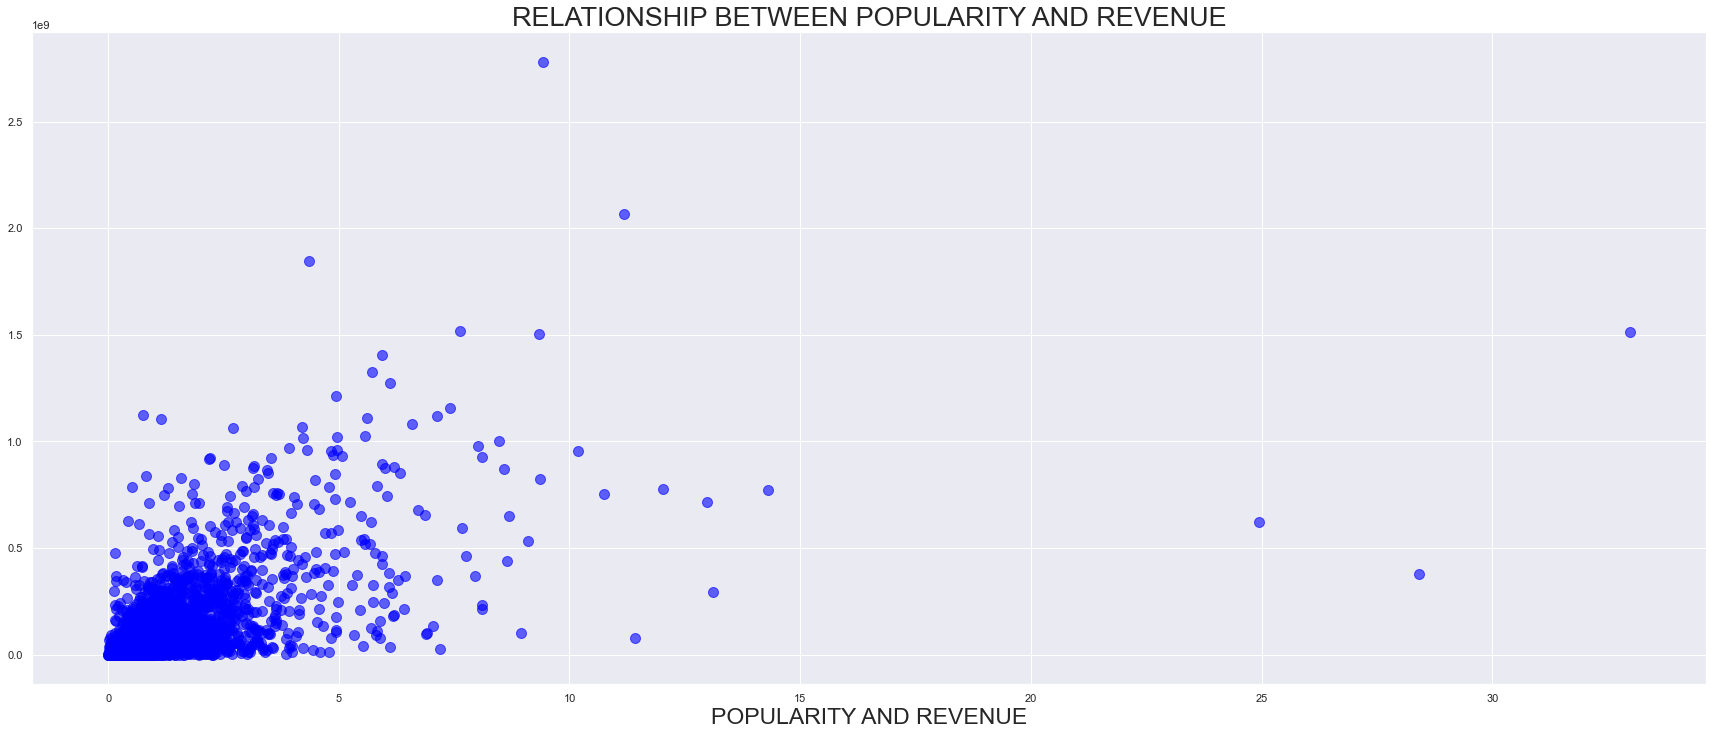

In [39]:
# Scatter plot showing the relatedness in the budget and the revenue
fig = plt.figure(figsize =(30, 12))
color = ['blue']
plt.scatter(df['popularity'], df['revenue'],s=100,c=color,alpha=0.6, marker='o')
plt.xlabel('POPULARITY AND REVENUE', fontsize = 23)
plt.ylabel('' , fontsize = 23)
plt.title('RELATIONSHIP BETWEEN POPULARITY AND REVENUE', fontsize = 27)

**Scatterplot relationship between the budget and Revenue**

> This scatterplot shows is a strong correlation between popularity and revenue which is indicative of the fact that a movie with high popularity rating will most likely generated a high revenue


### Percentage Change in budget and revenue due to 2010 dollar inflation 

In [40]:
df_top_rev['rev_%_change'] = ((df_top_rev['revenue_inflation'] - df_top_rev['revenue'])/df_top_rev['revenue_inflation'])*100

df_top_rev['bud_%_change'] = ((df_top_rev['budget_inflation'] - df_top_rev['budget'])/df_top_rev['budget_inflation'])*100

In [41]:
df_top_rev

,popularity,budget,revenue,original_title,director,vote_average,release_year,budget_inflation,revenue_inflation,Cast,Genres,Production_companies,rev_%_change,bud_%_change
1386,9.432768,237000000,2781505847,Avatar,James Cameron,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Action,Ingenious Film Partners,1.61358,1.61358
1329,12.037933,11000000,775398007,Star Wars,George Lucas,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Adventure,Lucasfilm,72.20509,72.20509
5231,4.355219,200000000,1845034188,Titanic,James Cameron,7.3,1997,2.716921e+08,2.506406e+09,Kate Winslet,Drama,Paramount Pictures,26.38725,26.38725
10594,2.010733,8000000,441306145,The Exorcist,William Friedkin,7.2,1973,3.928928e+07,2.167325e+09,Linda Blair,Drama,Warner Bros.,79.63821,79.63821
9806,2.563191,7000000,470654000,Jaws,Steven Spielberg,7.3,1975,2.836275e+07,1.907006e+09,Roy Scheider,Horror,Universal Pictures,75.31974,75.31974
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Lucasfilm,-8.69570,-8.69570
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,7.2,1982,2.372625e+07,1.791694e+09,Henry Thomas,Science Fiction,Universal Pictures,55.74521,55.74521
8094,1.136610,22000000,1106279658,The Net,Irwin Winkler,5.6,1995,3.148127e+07,1.583050e+09,Sandra Bullock,Crime,Columbia Pictures,30.11718,30.11718
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,6.6,1961,2.917944e+07,1.574815e+09,Rod Taylor,Adventure,Walt Disney Productions,86.29172,86.29172
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,7.3,2012,2.089437e+08,1.443191e+09,Robert Downey Jr.,Science Fiction,Marvel Studios,-5.29150,-5.29150


In [42]:
df_top_rev[['budget', 'revenue', 'revenue_inflation', 'budget_inflation', 'rev_%_change', 'bud_%_change' ]]

,budget,revenue,revenue_inflation,budget_inflation,rev_%_change,bud_%_change
1386,237000000,2781505847,2.827124e+09,2.408869e+08,1.61358,1.61358
1329,11000000,775398007,2.789712e+09,3.957559e+07,72.20509,72.20509
5231,200000000,1845034188,2.506406e+09,2.716921e+08,26.38725,26.38725
10594,8000000,441306145,2.167325e+09,3.928928e+07,79.63821,79.63821
9806,7000000,470654000,1.907006e+09,2.836275e+07,75.31974,75.31974
3,200000000,2068178225,1.902723e+09,1.839999e+08,-8.69570,-8.69570
8889,10500000,792910554,1.791694e+09,2.372625e+07,55.74521,55.74521
8094,22000000,1106279658,1.583050e+09,3.148127e+07,30.11718,30.11718
10110,4000000,215880014,1.574815e+09,2.917944e+07,86.29172,86.29172
4361,220000000,1519557910,1.443191e+09,2.089437e+08,-5.29150,-5.29150


### Revenue versus Revenue Inflation to complement percentage change Calculation

Text(0.5, 1.0, 'REVENUE VERSUS REVENUE INFLATION FOR PERCENTAGE CHANGE OF TOP MOVIES')

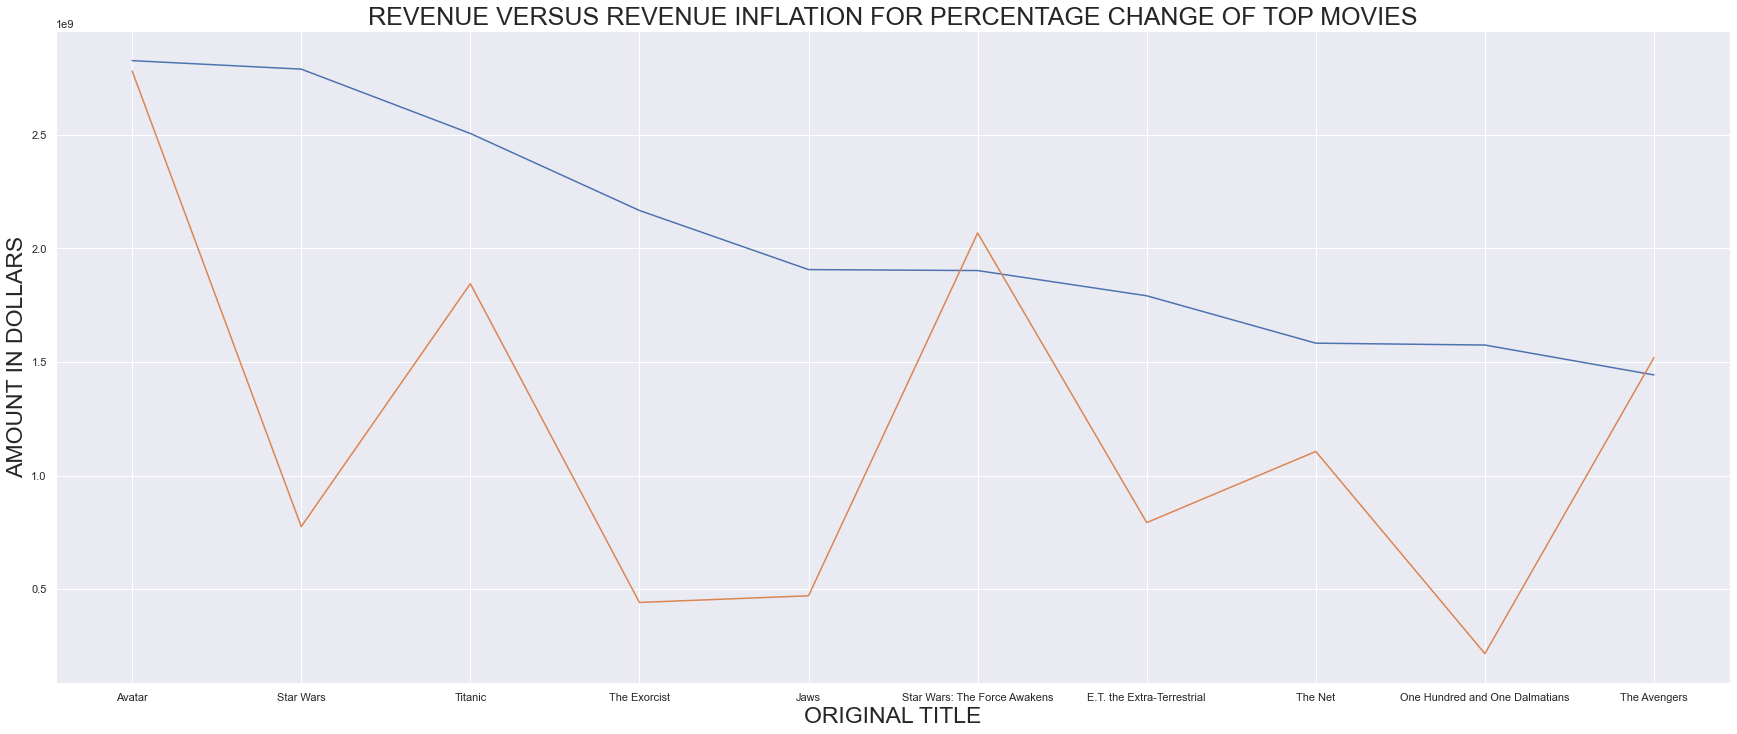

In [43]:
fig = plt.figure(figsize =(30, 12))
plt.plot(df_top_rev["original_title"], df_top_rev["revenue_inflation"]);
plt.plot(df_top_rev["original_title"], df_top_rev["revenue"]);

plt.xlabel('ORIGINAL TITLE', fontsize = 23)
plt.ylabel('AMOUNT IN DOLLARS', fontsize = 23)
plt.title('REVENUE VERSUS REVENUE INFLATION FOR PERCENTAGE CHANGE OF TOP MOVIES', fontsize = 25)

Text(0.5, 1.0, 'REVENUE AND REVENUE INFLATION WITH INFLATED REVENUE')

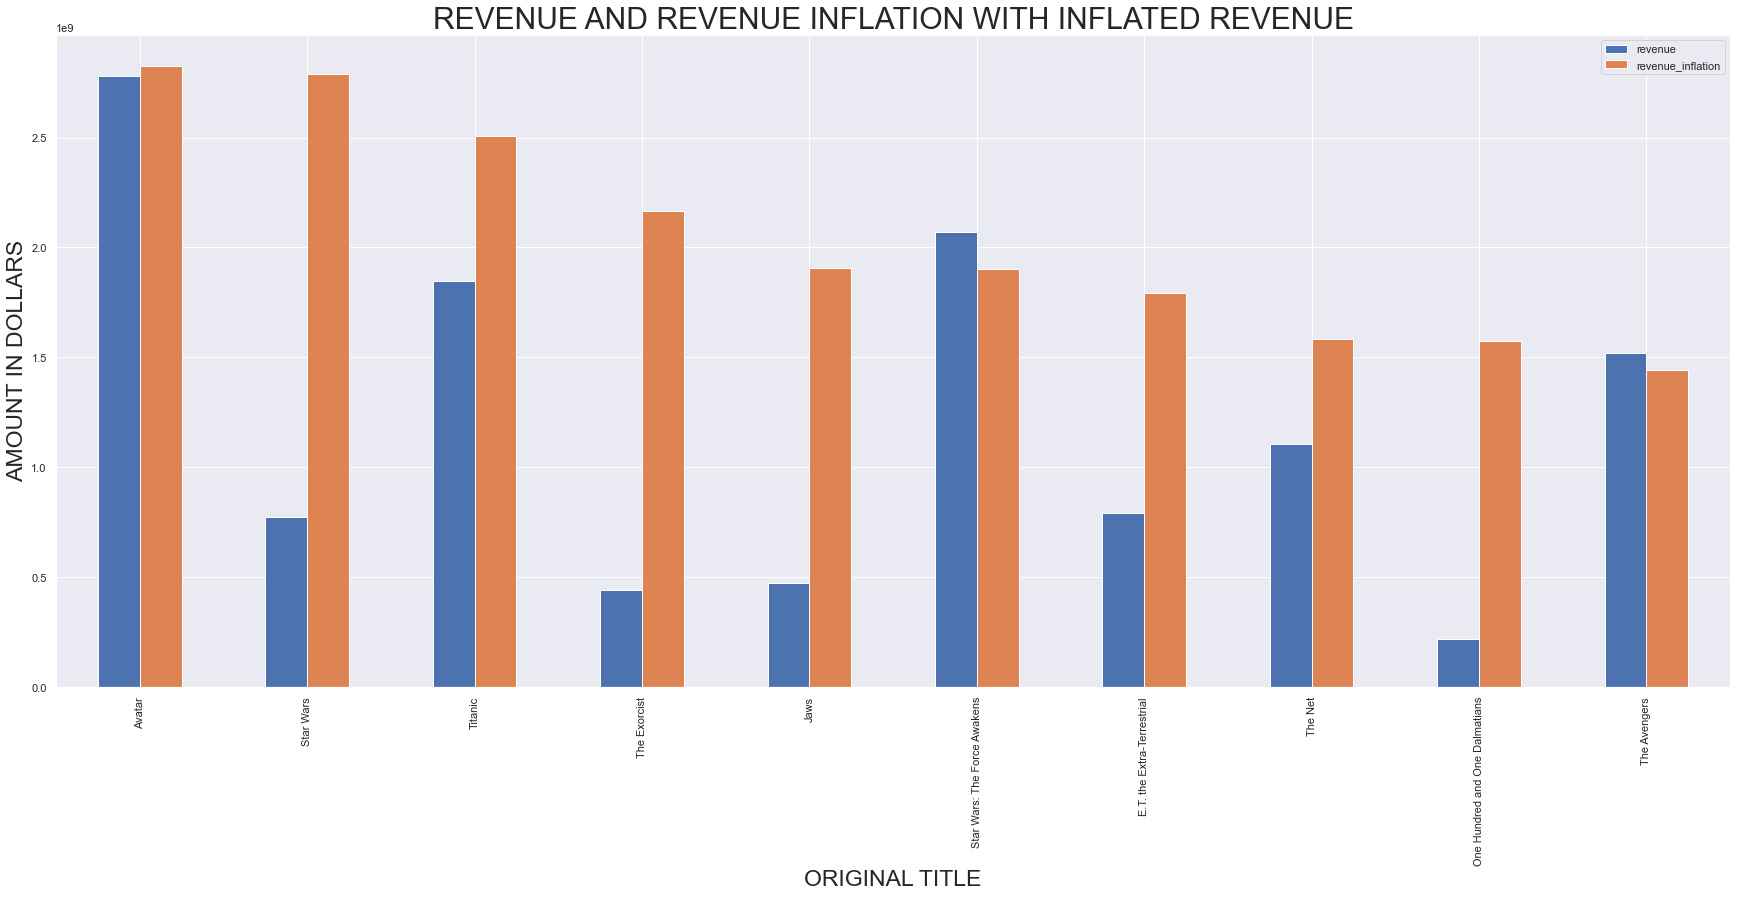

In [44]:
df_top_rev.plot(x = 'original_title', y = ['revenue', 'revenue_inflation'], kind = 'bar', figsize = (30, 12))
plt.ylabel('Amount in dollars')
plt.ylabel('AMOUNT IN DOLLARS', fontsize = 23)
plt.xlabel('ORIGINAL TITLE', fontsize = 23)
plt.title('REVENUE AND REVENUE INFLATION WITH INFLATED REVENUE', fontsize = 30)

### Budget versus Budget Inflation to complement percentage change Calculation

Text(0.5, 1.0, 'BUDGET VERSUS BUDGET INFLATION FOR PERCENTAGE CHANGE OF TOP MOVIES')

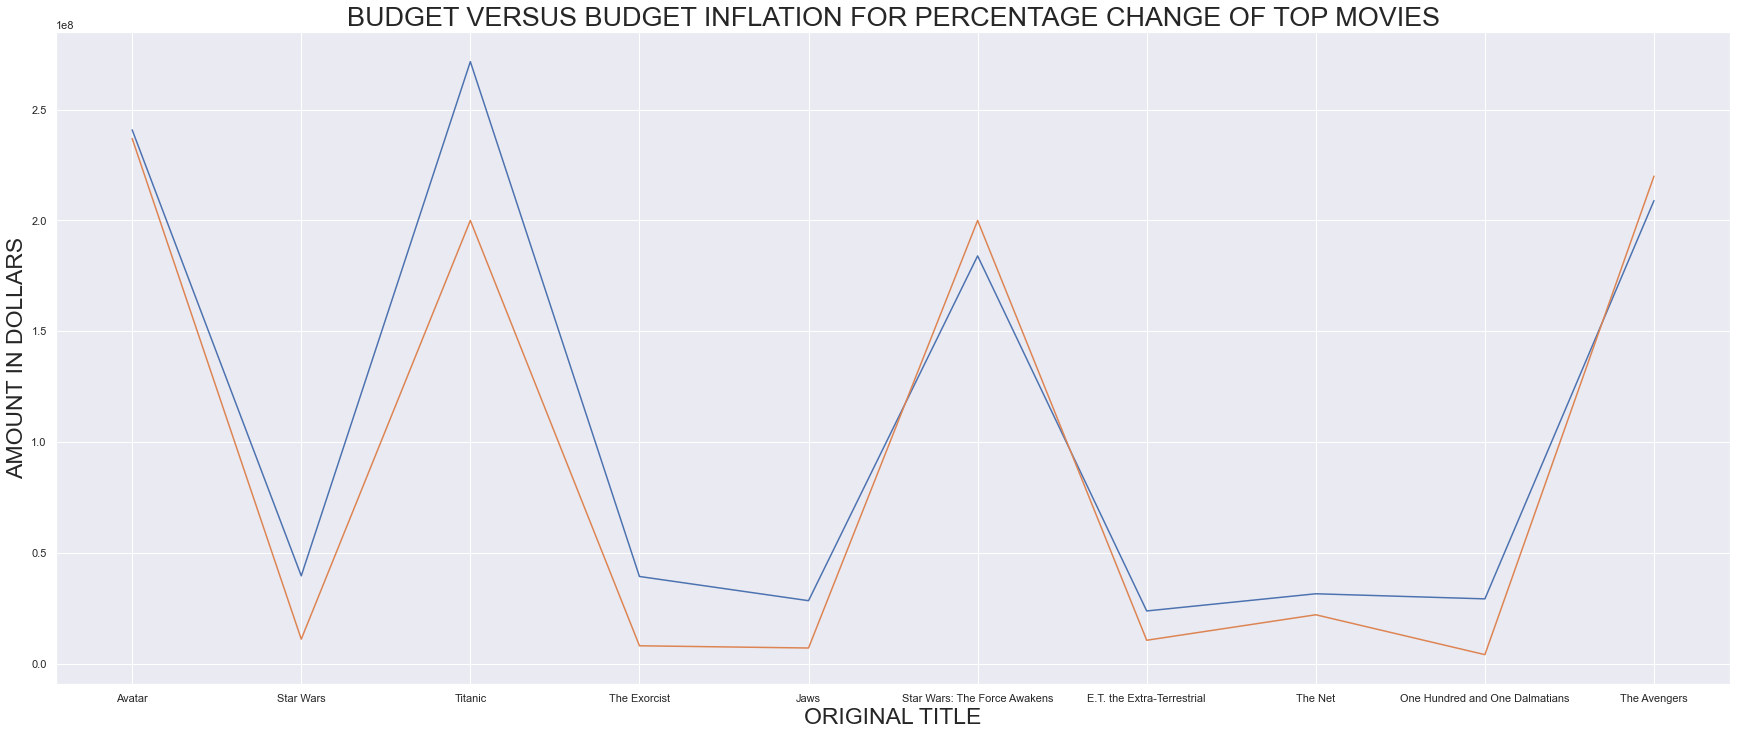

In [45]:
fig = plt.figure(figsize =(30, 12))
plt.plot(df_top_rev["original_title"], df_top_rev["budget_inflation"]);
plt.plot(df_top_rev["original_title"], df_top_rev["budget"]);

plt.xlabel('ORIGINAL TITLE', fontsize = 23)
plt.ylabel('AMOUNT IN DOLLARS', fontsize = 23)
plt.title('BUDGET VERSUS BUDGET INFLATION FOR PERCENTAGE CHANGE OF TOP MOVIES', fontsize = 27)

Text(0.5, 1.0, 'BUDGET AND BUDGET INFLATION WITH INFLATED REVENUE')

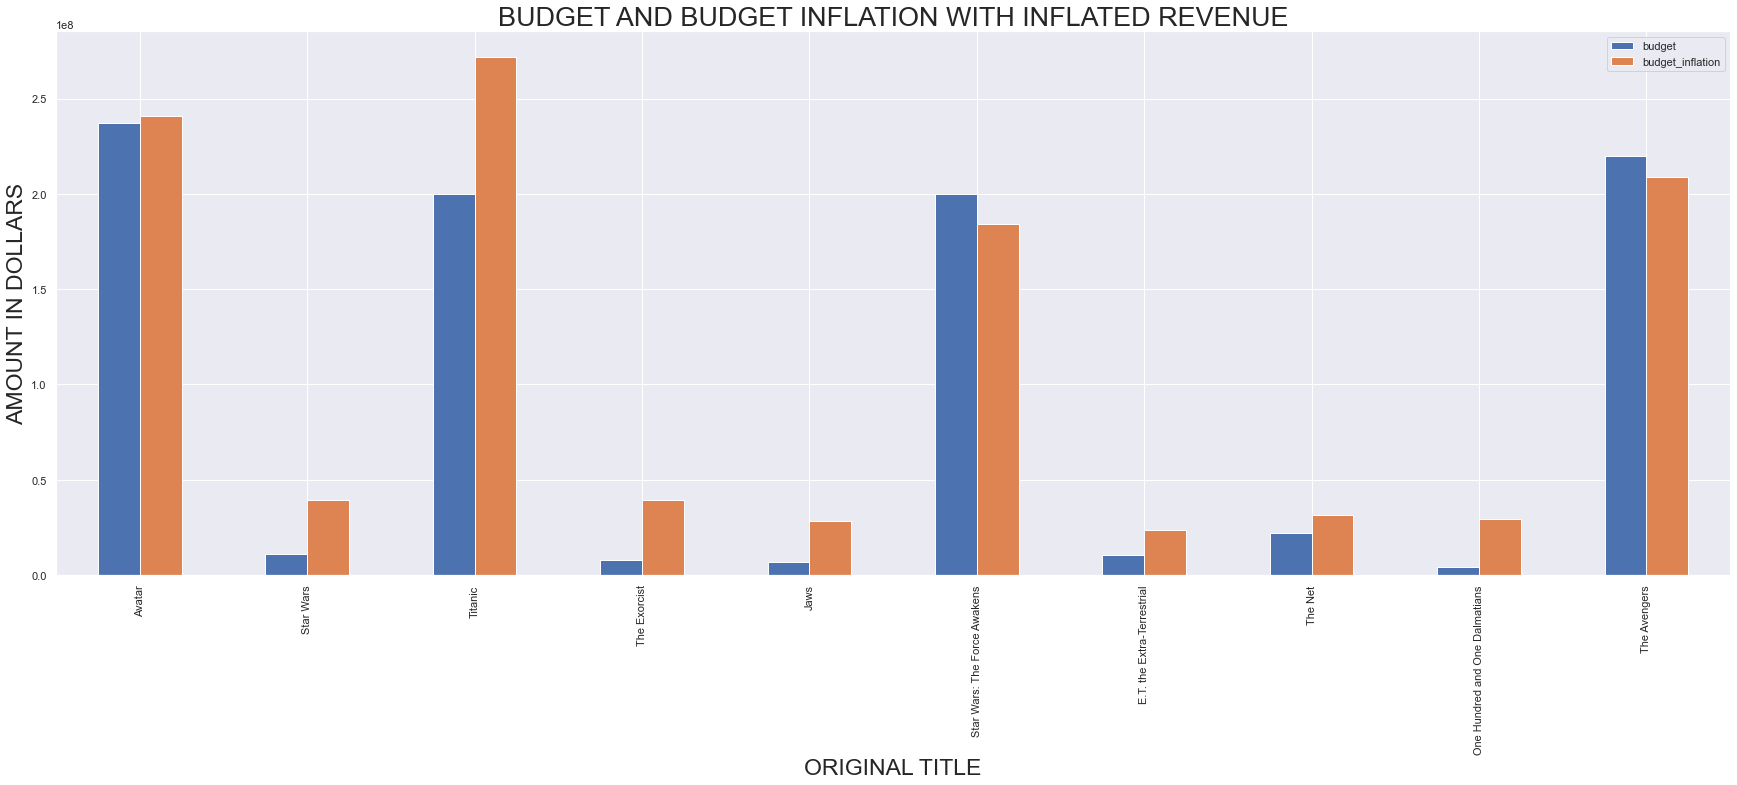

In [46]:
df_top_rev.plot(x = 'original_title', y = ['budget', 'budget_inflation'], kind = 'bar', figsize = (30, 10))
plt.ylabel('AMOUNT IN DOLLARS', fontsize = 23)
plt.xlabel('ORIGINAL TITLE', fontsize = 23)
plt.title('BUDGET AND BUDGET INFLATION WITH INFLATED REVENUE', fontsize = 27)

### Release year of Top movies with Inflated Revenue

Text(0.5, 1.0, 'RELEASE YEAR OF TOP MOVIES WITH INFLATED REVENUE')

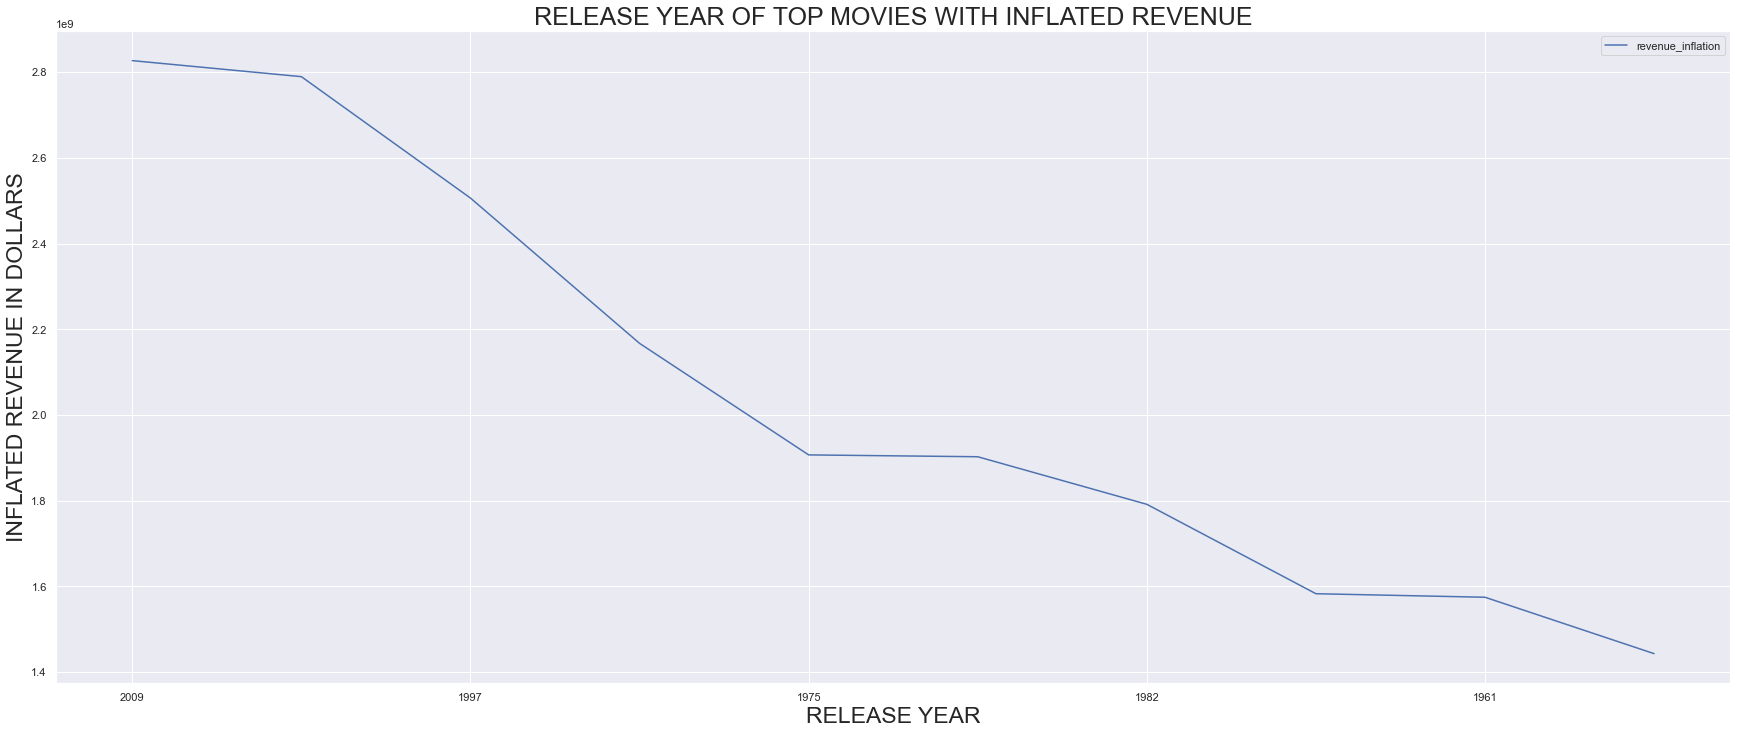

In [47]:
df_top_rev.plot(title= 'plot release year with revenue',x='release_year', y='revenue_inflation',
                legend=True,kind='line', figsize=(30, 12));
plt.ylabel('INFLATED REVENUE IN DOLLARS', fontsize = 23)
plt.xlabel('RELEASE YEAR', fontsize = 23)
plt.title('RELEASE YEAR OF TOP MOVIES WITH INFLATED REVENUE', fontsize = 25)

**Visualization Conclusion**

> * Avatar, Star Wars and Titanic are the top 3 movies with the highest inflation revenue. Avatar has the highest inflation revenue which is $2,827,124,000
> * Action, Adventure and Drama are the top 3 genres of movies with the highest inflation revenue
> * Sam, Mark and Kate are the top 3 casts that featured in the movies with the highest inflation revenue
> * James, George and Williams are the top 3 directors that directed the movies with the highest inflation revenue
> * Indigenous Films partner, Lucasfilm and Paramount Pictures are the top 3 production companies that produced the movies with the highest inflation revenue
> * Star wars, Star wars – The Force awaken and Avengers are the top 3 movies with the highest popularity among other movies
> * Star wars, Star wars – The Force awaken and Avengers are the top 3 movies with the highest vote average
> * The movie with the highest revenue which is Avatar was released in the year 2009. Movies released after 1961 has a progressive increase in revenue

**Heatmap Correlation Analysis Inferences:**
> * There is a strong correlation between popularity of movie and revenue
> * The scatterplot shows is a strong correlation between popularity and revenue which is indicative of the fact that a movie with high budget will most likely generated a high revenue
> * There is a strong correlation between budget and revenue
> * The scatterplot shows is a strong correlation between budget and revenue which is indicative of the fact that a movie with high budget will most likely generated a high revenue
> * Correlation between budget and budget inflation as well as revenue and revenue inflation was 1, which informs that the > * percentage change due to 2010 inflation was the same for those features

**Bottlenecks**

> * The separation of some features with “|” made it complicated to fully factor in other elements in such feature. This also increased the time taken for data cleaning.
